In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-whitegrid')
%matplotlib inline

import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
import keras
from keras import models, layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.applications import VGG16
from keras.optimizers import SGD
from keras.preprocessing import image as image_utils
from keras.utils import to_categorical
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
import cv2

import warnings
warnings.filterwarnings(action='ignore')

In [35]:
gestures = {'L_': 'L',
           'fi': 'Fist',
           'C_': 'C',
           'ok': 'Okay',
           'pe': 'Peace',
           'pa': 'Palm'
            }

gestures_map = {'Fist' : 0,
                'L': 1,
                'Okay': 2,
                'Palm': 3,
                'Peace': 4
                }

#### Drawing data

In [31]:
X_data = []
y_data = []
image_path = []
gesture = []
image_rgb = []

directory = os.fsencode('/home/ubuntu/project_kojak/frames/drawings/drawings/')

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".jpg") and (not filename.startswith("drawing_C_")): 
        path = os.path.join('/home/ubuntu/frames2/drawings/', filename)
        # path = os.path.join('/home/ubuntu/project_kojak/frames/drawings/drawings/', filename)
        gesture_name = gestures[filename[8:10]]
        
        gesture.append(gesture_name)
        y_data.append(gestures_map[gesture_name])
        image_path.append(path)

        
        img = Image.open(path).convert('L')
        img = img.resize((224, 224))
        arr = np.array(img)
        X_data.append(arr)
        
#         img2rgb = image_utils.load_img(path=path, target_size=(224, 224))
#         img2rgb = image_utils.img_to_array(img2rgb)
#         image_rgb.append(img2rgb)

        img2rgb = Image.open(path)
        img2rgb = img2rgb.resize((224, 224))
        img2rgb = np.array(img2rgb)
        image_rgb.append(img2rgb)

        


#         y_values = np.full((count, 1), lookup[j]) 
#         y_data.append(y_values)

    else:
        continue
        
image_rgb = np.array(image_rgb, dtype = 'float32')
# x_data = np.array(x_data, dtype=np.uint8)
image_rgb = image_rgb.reshape((len(image_rgb), 224, 224, 3))
image_rgb /= 255

# X_data = np.array(X_data, dtype = 'float32')
# X_data = X_data.reshape((len(image_rgb), 224, 224, 3))
# X_data /= 255

y_data = np.array(y_data)
y_data = to_categorical(y_data)

ValueError: cannot reshape array of size 54792192 into shape (1092,224,224,3)

### Sign Language Data

In [ ]:
X_data = []
y_data = []
image_path = []
letters = []
image_rgb = []

count = 0

directory = os.fsencode('/home/ubuntu/asl_alphabet')
file_list = []

for folder in os.listdir('/home/ubuntu/asl_alphabet'):
    if not folder.startswith('.'):
        for filename in os.listdir('/home/ubuntu/asl_alphabet/' + str(folder)):
            path = '/home/ubuntu/asl_alphabet/' + str(folder) + filename
            count +=1
            if count == 10:
                break
            else:
                print(path)
            
                


    
#     filename = os.fsdecode(file)
#     if filename.endswith(".jpg") and (not filename.startswith("drawing_C_")): 
#         path = os.path.join('/home/ubuntu/project_kojak/frames/drawings/drawings/', filename)
#         gesture_name = gestures[filename[8:10]]
        
#         gesture.append(gesture_name)
#         y_data.append(gestures_map[gesture_name])
#         image_path.append(path)

        
#         img = Image.open(path).convert('L')
#         img = img.resize((224, 224))
#         arr = np.array(img)
#         X_data.append(arr)
        
# #         img2rgb = image_utils.load_img(path=path, target_size=(224, 224))
# #         img2rgb = image_utils.img_to_array(img2rgb)
# #         image_rgb.append(img2rgb)

#         img2rgb = Image.open(path)
#         img2rgb = img2rgb.resize((224, 224))
#         img2rgb = np.array(img2rgb)
#         image_rgb.append(img2rgb)

        


# #         y_values = np.full((count, 1), lookup[j]) 
# #         y_data.append(y_values)

#     else:
#         continue
        
# image_rgb = np.array(image_rgb, dtype = 'float32')
# # x_data = np.array(x_data, dtype=np.uint8)
# image_rgb = image_rgb.reshape((len(image_rgb), 224, 224, 3))
# image_rgb /= 255

# y_data = np.array(y_data)
# y_data = to_categorical(y_data)

In [24]:
len(letters)

41

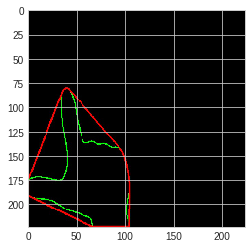

In [86]:
import matplotlib.pyplot as plt
plt.imshow(img2rgb)

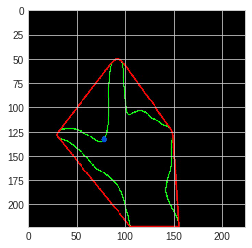

In [100]:
plt.imshow(image_rgb[330])

#### Silhouettes data

In [36]:
X_data = []
y_data = []
image_path = []
gesture = []
image_rgb = []

directory = os.fsencode('/home/ubuntu/frames2/silhouettes/')

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".jpg") and (not filename.startswith("C_")): 
        path = os.path.join('/home/ubuntu/frames2/silhouettes/', filename)
        # path = os.path.join('/home/ubuntu/project_kojak/frames/silhouettes/', filename)
        gesture_name = gestures[filename[0:2]]
        
        gesture.append(gesture_name)
        y_data.append(gestures_map[gesture_name])
        image_path.append(path)

        
        img = Image.open(path) #.convert('L')
        img = img.resize((224, 224))
        img = np.array(img)
        X_data.append(img)
        
        img2rgb = image_utils.load_img(path=path, target_size=(224, 224))
        img2rgb = image_utils.img_to_array(img2rgb)
        image_rgb.append(img2rgb)


#         y_values = np.full((count, 1), lookup[j]) 
#         y_data.append(y_values)

    else:
        continue
        
image_rgb = np.array(image_rgb, dtype = 'float32')
# x_data = np.array(x_data, dtype=np.uint8)
image_rgb = image_rgb.reshape((len(image_rgb), 224, 224, 3))
image_rgb /= 255

X_data = np.array(X_data, dtype = 'float32')
# X_data = X_data.reshape((len(X_data), 224, 224, 1))
X_data = np.stack((X_data,)*3, axis=-1)
X_data /= 255

y_data = np.array(y_data)
y_data = to_categorical(y_data)

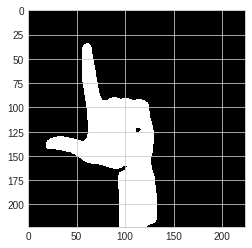

In [86]:
plt.imshow(X_data[5])

In [40]:
# Send the dictionaries to a dataframe to be saved for future use
# d = {'image_path':image_path, 'gesture':gesture, 'image_rgb': image_rgb, 'image_bw_x': X_data, 'image_bw_y': y_data}
d = {'image_path':image_path, 'gesture':gesture}
df = pd.DataFrame(d)
# df['gesture_num'] = df['gesture'].apply(lambda x: x[1:2])
# df['gesture_name'] = df['gesture'].apply(lambda x: x[3:])

# df.to_csv('silhouette_df.csv')
# df = pd.read_csv('silhouette_df.csv')

In [120]:
df['y'] = df['gesture'].map(gestures_map)

In [121]:
df['y'].value_counts()

4    234
2    214
1    214
5    170
3    139
Name: y, dtype: int64

In [23]:
# X_data, y_data = process_data(X_data, y_data)
# image_rgb, y_data = process_data_rgb(image_rgb, y_data)

#### Bring in Kaggle data

In [55]:
gestures_map = {3 : 0,
                2: 1,
                7: 2,
                1: 3,
                'Peace': 4
                }

X_data = []
y_data = []
image_path = []
gesture = []
image_rgb = []

root_dir = os.fsencode('/home/ubuntu/project_kojak/data/gestures_data/')

for directory, subdirectories, files in os.walk(root_dir):
    for file in files:
        if not file.startswith(b'.'):
            gesture_name = int(file.decode('utf8')[10:11])
            if gesture_name in [1,2,3,7]:
                path = os.path.join(directory, file).decode('utf8')
                gesture.append(gesture_name)
                y_data.append(gestures_map[gesture_name])
                image_path.append(path)

                img = cv2.imread(path, cv2.IMREAD_COLOR)
                img = cv2.flip(img, 1)
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                blur = cv2.GaussianBlur(gray, (41, 41), 0) #tuple indicates blur value
                ret, thresh = cv2.threshold(blur, 150, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
                thresh = cv2.resize(thresh, (224, 224))
                thresh = np.array(thresh)
                X_data.append(thresh)
                
#                 img = Image.open(path) #.convert('L')
#                 img = img.resize((224, 224))
#                 img = np.array(img)
#                 X_data.append(img)

#                 img2rgb = image_utils.load_img(path=path, target_size=(224, 224))
#                 img2rgb = image_utils.img_to_array(img2rgb)
#                 image_rgb.append(img2rgb)
            else:
                continue
    


        #         y_values = np.full((count, 1), lookup[j]) 
        #         y_data.append(y_values)


image_rgb = np.array(image_rgb, dtype = 'float32')
# x_data = np.array(x_data, dtype=np.uint8)
image_rgb = image_rgb.reshape((len(image_rgb), 224, 224, 3))
image_rgb /= 255

X_data = np.array(X_data, dtype = 'float32')
# X_data = X_data.reshape((len(X_data), 224, 224, 1))
X_data = np.stack((X_data,)*3, axis=-1)
X_data /= 255

y_data = np.array(y_data)
y_data = to_categorical(y_data)

In [58]:
z = np.zeros((len(y_data),1))
y_data = np.append(y_data, z, axis=1)

In [59]:
y_data.shape

(8000, 5)

In [181]:
# Have to do this because the Kaggle data set doesn't have peace signs, so we add zeros so the shapes will match up
y_data = np.pad(y_data, (0,1), 'constant')

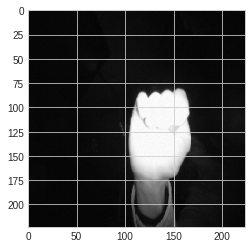

In [164]:
plt.imshow(X_data[250])

#### Train-test split

In [37]:
X_train, y_train = X_data, y_data

In [17]:
# X_train_rgb, X_test_rgb, y_train_rgb, y_test_rgb = train_test_split(image_rgb, y_data, test_size = 0.2, random_state=12, stratify=y_data)
X_train_rgb, X_test_rgb, y_train_rgb, y_test_rgb = train_test_split(X_data, y_data, test_size = 0.2, random_state=12, stratify=y_data)

#### Build the VGG Model

In [40]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

file_path = 'models/saved_model.hdf5'
model_checkpoint = ModelCheckpoint(filepath=file_path, save_best_only=True)

early_stopping = EarlyStopping(monitor='val_acc', 
                               min_delta=0, 
                               patience=10,
                               verbose=1, 
                               mode='auto', 
                               restore_best_weights=True)

In [60]:
# load VGG16
#Get back the convolutional part of a VGG network trained on ImageNet
import keras
from keras import models, layers, optimizers
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.models import Model
imageSize=224
model1 = VGG16(weights='imagenet', include_top=False, input_shape=(imageSize, imageSize, 3))
optimizer1 = optimizers.Adam()

# datagen = ImageDataGenerator(
# featurewise_center=True,
# featurewise_std_normalization=True,
# rotation_range=45.,
# width_shift_range=0.2,
# height_shift_range=0.2,
# horizontal_flip=True)

base_model = model1 # Topless
# Add top layer
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
x = Dense(128, activation='relu', name='fc3')(x)
x = Dropout(0.5) (x)
x = Dense(64, activation='relu', name='fc4')(x)
#### Playing with other architectures
#     x = Flatten() (x)
#     x = Dense(64) (x)
#     x = Activation('relu') (x)
#     x = Dropout(0.5) (x)
#     x = Dense(32) (x)
#     x = Activation('relu') (x)
#     x = Dropout(0.5) (x)
####
predictions = Dense(5, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Train top layer
for layer in base_model.layers:
    layer.trainable = False

# model.compile(loss='categorical_crossentropy', 
#       optimizer=optimizers.Adam(), 
#       metrics=['accuracy'])
# callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]

# datagen.fit(X_train_rgb)

# # Fit model
# model.fit_generator(datagen.flow(X_train_rgb, y_train_rgb, batch_size=64),
#                 steps_per_epoch=len(X_train_rgb) / 64, epochs=8, validation_data=(X_test_rgb, y_test_rgb))
# #class_weight=classweight,

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_data, y_data, epochs=200, batch_size=64, validation_data=(X_train, y_train), verbose=1, callbacks =[early_stopping, model_checkpoint])
# model.fit(X_train_rgb, y_train_rgb, epochs=200, batch_size=64, validation_data=(X_data, y_data), verbose=1, callbacks =[early_stopping, model_checkpoint])

# datagen = ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     rotation_range=45.,
#     width_shift_range=0.3,
#     height_shift_range=0.3,
#     horizontal_flip=True)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
# datagen.fit(X_train_rgb)

# fits the model on batches with real-time data augmentation:
# model.fit_generator(datagen.flow(X_train_rgb, y_train_rgb, batch_size=32),
#                     steps_per_epoch=len(X_train_rgb)/32, epochs=150, validation_data=(X_test_rgb, y_test_rgb))


Train on 8000 samples, validate on 2748 samples
Epoch 1/200
8000/8000 [==============================] - 20s 3ms/step - loss: 0.1974 - acc: 0.9223 - val_loss: 3.8344 - val_acc: 0.5328
Epoch 2/200
8000/8000 [==============================] - 17s 2ms/step - loss: 0.0103 - acc: 0.9968 - val_loss: 3.9479 - val_acc: 0.5677
Epoch 3/200
8000/8000 [==============================] - 17s 2ms/step - loss: 2.7804e-04 - acc: 1.0000 - val_loss: 4.3325 - val_acc: 0.5415
Epoch 4/200
8000/8000 [==============================] - 17s 2ms/step - loss: 4.1212e-04 - acc: 0.9999 - val_loss: 4.4374 - val_acc: 0.5266
Epoch 5/200
8000/8000 [==============================] - 17s 2ms/step - loss: 1.8591e-04 - acc: 1.0000 - val_loss: 4.6763 - val_acc: 0.5320
Epoch 6/200
8000/8000 [==============================] - 17s 2ms/step - loss: 4.4846e-05 - acc: 1.0000 - val_loss: 4.7086 - val_acc: 0.5411
Epoch 7/200
8000/8000 [==============================] - 17s 2ms/step - loss: 5.6643e-05 - acc: 1.0000 - val_loss: 4.815

#### Save and import model

In [61]:
model.save('models/VGG_reversed.h5')

In [88]:
# model.save('silhouette_VGG.h5')

from keras.models import load_model
model = load_model('/home/ubuntu/project_kojak/silhouette_VGG.h5')

In [ ]:
X_test_rgb[0].shape

#### Get classification metrics

In [48]:
def get_classification_metrics(X_test, y_test):
    pred = model.predict(X_test)
    pred = np.argmax(pred, axis=1)
    y_true = np.argmax(y_test, axis=1)
    print(confusion_matrix(y_true, pred))
    print('\n')
    print(classification_report(y_true, pred))

**VGG_cross_validated model**

Note that there are no predictions for class \#5 since 'Peace' sign did not exist in cross_val images

In [49]:
# get_classification_metrics(X_data, y_data)

[[200   0   0   0   0]
 [  0 199   0   1   0]
 [  0   0 200   0   0]
 [ 11   0   0 187   2]
 [  0   0   0   0   0]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       200
           1       1.00      0.99      1.00       200
           2       1.00      1.00      1.00       200
           3       0.99      0.94      0.96       200
           4       0.00      0.00      0.00         0

   micro avg       0.98      0.98      0.98       800
   macro avg       0.79      0.79      0.79       800
weighted avg       0.99      0.98      0.98       800



In [92]:
model.predict(X_test_rgb)

array([[2.5975669e-03, 6.8540269e-01, 8.0532441e-03, 4.6215006e-03,
        2.7723959e-01, 2.2085395e-02],
       [1.8037352e-04, 9.8982668e-01, 2.2430022e-04, 8.4401938e-05,
        9.5383069e-03, 1.4591584e-04],
       [2.7303877e-05, 6.1461215e-05, 4.7820024e-04, 7.3979894e-04,
        4.0442785e-04, 9.9828881e-01],
       ...,
       [1.7109163e-04, 3.7865416e-04, 2.1471193e-03, 2.1336788e-02,
        1.3310532e-02, 9.6265584e-01],
       [4.4995941e-05, 1.9672023e-02, 3.9480557e-04, 1.5412706e-04,
        9.7355169e-01, 6.1823567e-03],
       [2.1220765e-05, 2.9467508e-05, 9.6603344e-06, 9.9880779e-01,
        1.1285117e-03, 3.3434828e-06]], dtype=float32)

In [138]:
pred = model.predict(X_test_rgb)
pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test_rgb, axis=1)

In [139]:
print(confusion_matrix(y_true, pred))
print('\n')
print(classification_report(y_true, pred))

[[53  3  0  0  0]
 [ 0 77  0  0  0]
 [ 1 33  2  0  0]
 [33  5 13 12  0]
 [ 0 57  0  0  3]]


             precision    recall  f1-score   support

          0       0.61      0.95      0.74        56
          1       0.44      1.00      0.61        77
          2       0.13      0.06      0.08        36
          3       1.00      0.19      0.32        63
          4       1.00      0.05      0.10        60

avg / total       0.67      0.50      0.40       292



In [50]:
y_test_rgb

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [55]:
pred = np.argmax(model.predict(X_test_rgb), axis=1)

In [63]:
gesture_names = {0: 'C',
                 1: 'Fist',
                 2: 'L',
                 3: 'Okay',
                 4: 'Palm',
                 5: 'Peace'}

def predict_rgb_image_vgg(path):
    img2rgb = image_utils.load_img(path=path, target_size=(224, 224))
    img2rgb = image_utils.img_to_array(img2rgb)
#     image_rgb.append(img2rgb)
    img2rgb = img2rgb.reshape(1, 224, 224, 3)
    return gesture_names[np.argmax(model.predict(img2rgb))]

In [ ]:
predict_rgb_image_vgg('images_to_predict/test - palm.jpg')

#### Image Augmentation

In [104]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=45.,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train_rgb)

# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(X_train_rgb, y_train_rgb, batch_size=32),
                    steps_per_epoch=len(X_train_rgb) / 128, epochs=10, validation_data=(X_test_rgb, y_test_rgb))

Epoch 1/10
8/7 [================================] - 11s 1s/step - loss: 1.6103 - acc: 0.5610 - val_loss: 1.5952 - val_acc: 0.3856
Epoch 2/10
8/7 [================================] - 9s 1s/step - loss: 0.8910 - acc: 0.6878 - val_loss: 1.5901 - val_acc: 0.4364
Epoch 3/10
8/7 [================================] - 10s 1s/step - loss: 0.6128 - acc: 0.7967 - val_loss: 1.5757 - val_acc: 0.4492
Epoch 4/10
8/7 [================================] - 10s 1s/step - loss: 0.5136 - acc: 0.8229 - val_loss: 1.1850 - val_acc: 0.5508
Epoch 5/10
8/7 [================================] - 10s 1s/step - loss: 0.4274 - acc: 0.8570 - val_loss: 1.3173 - val_acc: 0.5424
Epoch 6/10
8/7 [================================] - 10s 1s/step - loss: 0.3949 - acc: 0.8673 - val_loss: 1.0941 - val_acc: 0.6017
Epoch 7/10
8/7 [================================] - 10s 1s/step - loss: 0.3201 - acc: 0.9048 - val_loss: 0.9776 - val_acc: 0.6483
Epoch 8/10
8/7 [================================] - 10s 1s/step - loss: 0.3264 - acc: 0.890

In [80]:
model.save('models/new_new_new.h5')

In [109]:
np.argmax(model.predict(X_test_rgb[0].reshape(1,224,224,3)))

4

#### Build own model

In [78]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
# model.add(Dropout(0.25, seed=21))
model.add(layers.Dense(5, activation='softmax'))

In [79]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train[:500], y_train[:500], epochs=4, batch_size=64, validation_data=(X_test[:500], y_test[:500]), verbose=1, callbacks = [MetricsCheckpoint('logs')])

In [80]:
model.fit(X_train_rgb, y_train_rgb, epochs=200, batch_size=16, validation_data=(X_test_rgb, y_test_rgb), verbose=1, callbacks =[early_stopping, model_checkpoint])

Train on 1020 samples, validate on 256 samples
Epoch 1/200
1020/1020 [==============================] - 2s 2ms/step - loss: 1.4084 - acc: 0.4069 - val_loss: 1.1192 - val_acc: 0.5703
Epoch 2/200
1020/1020 [==============================] - 1s 746us/step - loss: 0.6555 - acc: 0.7657 - val_loss: 0.6208 - val_acc: 0.7930
Epoch 3/200
1020/1020 [==============================] - 1s 637us/step - loss: 0.2596 - acc: 0.9039 - val_loss: 0.4631 - val_acc: 0.8438
Epoch 4/200
1020/1020 [==============================] - 1s 708us/step - loss: 0.1080 - acc: 0.9627 - val_loss: 0.6910 - val_acc: 0.8359
Epoch 5/200
1020/1020 [==============================] - 1s 664us/step - loss: 0.0659 - acc: 0.9775 - val_loss: 0.6188 - val_acc: 0.8242
Epoch 6/200
1020/1020 [==============================] - 1s 703us/step - loss: 0.0566 - acc: 0.9794 - val_loss: 0.5668 - val_acc: 0.8633
Epoch 7/200
1020/1020 [==============================] - 1s 661us/step - loss: 0.0515 - acc: 0.9833 - val_loss: 0.5964 - val_acc: 0.8

In [26]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
#     shear_range=0.3,
)

In [27]:
datagen.fit(X_train_rgb)

ValueError: Input to `.fit()` should have rank 4. Got array with shape: (873, 224, 224)

In [ ]:
# fits the model on batches with real-time data augmentation:

model.fit_generator(datagen.flow(X_train_rgb, y_train_rgb, batch_size=64),
                    steps_per_epoch=len(X_train_rgb) / 64,
                    epochs=200,
                    validation_data=(X_test_rgb, y_test_rgb),
                    callbacks=[early_stopping])

In [81]:
model.save('models/black_white_thursday_2.h5')

In [51]:
model.save('models/silhouette_model.h5')

In [99]:
def get_classification_reports(y_pred, y_true):
    Y_pred_classes = np.array(np.argmax(y_pred))  # reconverts back from one hot encoded 
    Y_true = np.array(np.argmax(y_true))  # reconverts back from one hot encoded
    print(confusion_matrix(Y_true, Y_pred_classes))
    print(classification_report(Y_true, Y_pred_classes))

In [82]:
y_pred = model.predict(X_test_rgb)

In [83]:
y_pred.shape

(256, 5)

In [84]:
Y_pred_classes = np.argmax(y_pred,axis = 1)  # reconverts back from one hot encoded 

In [85]:
Y_true = np.argmax(y_test_rgb,axis = 1)

In [86]:
print(classification_report(Y_pred_classes, Y_true))

             precision    recall  f1-score   support

          0       0.91      0.89      0.90        44
          1       0.86      0.95      0.90        39
          2       0.90      0.81      0.85        53
          3       0.85      0.91      0.88        44
          4       0.95      0.93      0.94        76

avg / total       0.90      0.90      0.90       256



In [87]:
print(confusion_matrix(Y_pred_classes, Y_true))

[[39  2  0  2  1]
 [ 0 37  1  1  0]
 [ 3  3 43  3  1]
 [ 1  0  1 40  2]
 [ 0  1  3  1 71]]


In [105]:
y_test_rgb.shape

(195, 6)